**Day1 Notebook Flow:**

1. Import libraries
2. Data loading and initial inspection
3. Data cleaning
4. Univariate analysis
5. Bivariate anaysis
6. Feature engineering
7. Multivariate analysis
8. Correlation analysis
9. y-profiling

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [92]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [93]:
titanic_df = pd.read_csv('/content/Datasets/Titanic_Dataset/Titanic-Dataset.csv')
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [94]:
titanic_df.shape

(891, 12)

In [95]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [97]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
# Missing Value handling for "Age"
median_age = titanic_df['Age'].median()
titanic_df['Age'] = titanic_df['Age'].fillna(median_age)

print("Missing values after Age cleaning:")
print(titanic_df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Age cleaning:
Age           0
Embarked      2
Cabin       687
dtype: int64


In [99]:
# Missing value handling for "Embarked"
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)

print("Missing values after Embarked cleaning:")
print(titanic_df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Embarked cleaning:
Age           0
Embarked      0
Cabin       687
dtype: int64


In [100]:
# Missing value handling for "Cabin"
# create new Has_Cabin attribute
titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int) # 1 if has cabin, 0 if not
titanic_df.drop('Cabin', axis=1, inplace=True)

In [101]:
print("Missing values after cleaning:")
titanic_df.isna().sum()

Missing values after cleaning:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

Analyzing categorical features:


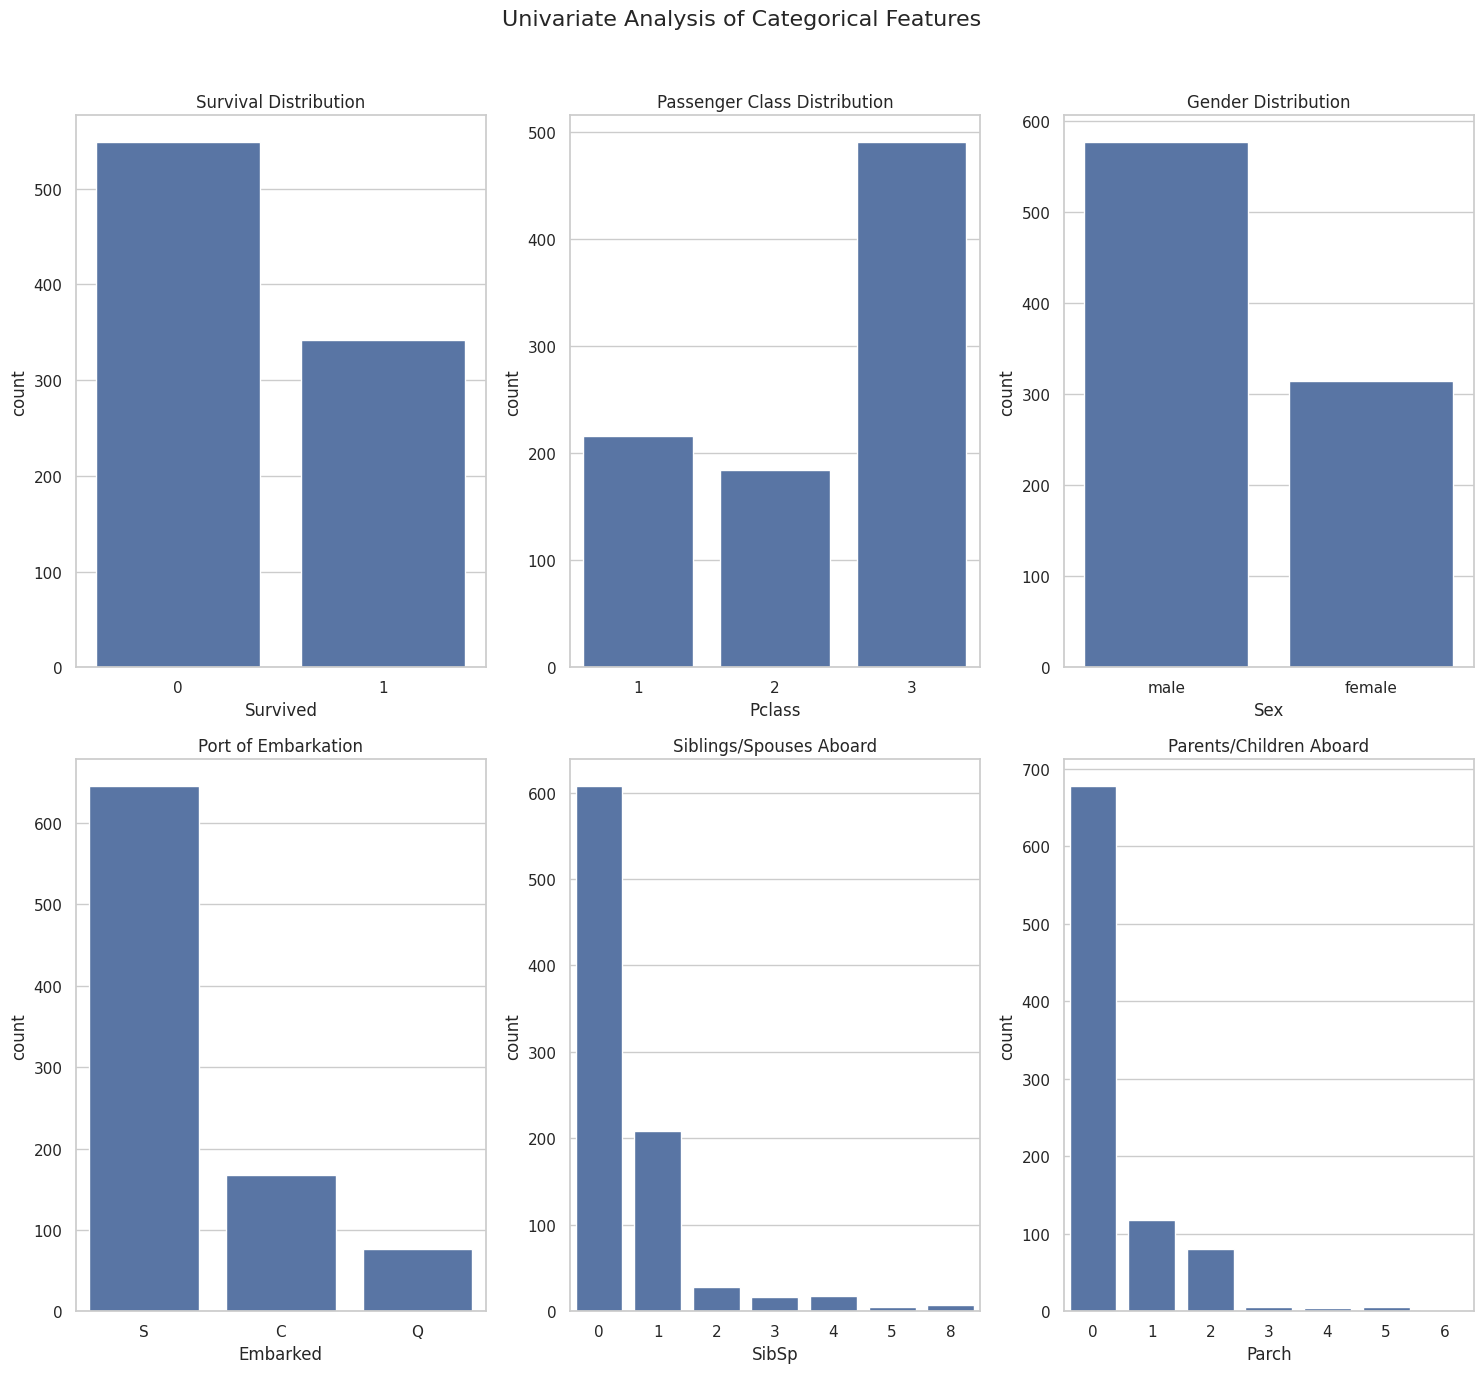

In [102]:
print("Analyzing categorical features:")

fig, axes = plt.subplots(2, 3, figsize=(15, 14))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

sns.countplot(ax=axes[0, 0], x='Survived', data=titanic_df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=titanic_df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=titanic_df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=titanic_df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=titanic_df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=titanic_df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Analyzing numerical features:


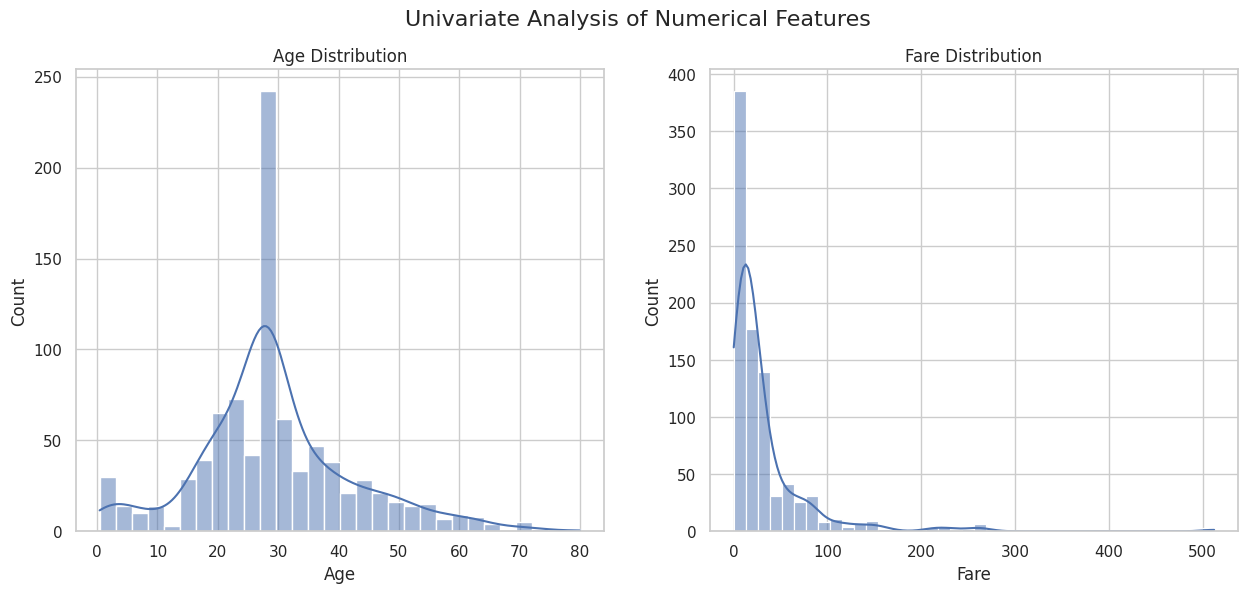

In [103]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

sns.histplot(ax=axes[0], data=titanic_df, x='Age', kde=True, bins=30).set_title('Age Distribution')
sns.histplot(ax=axes[1], data=titanic_df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

Bivariate Analysis: Feature vs. Survival


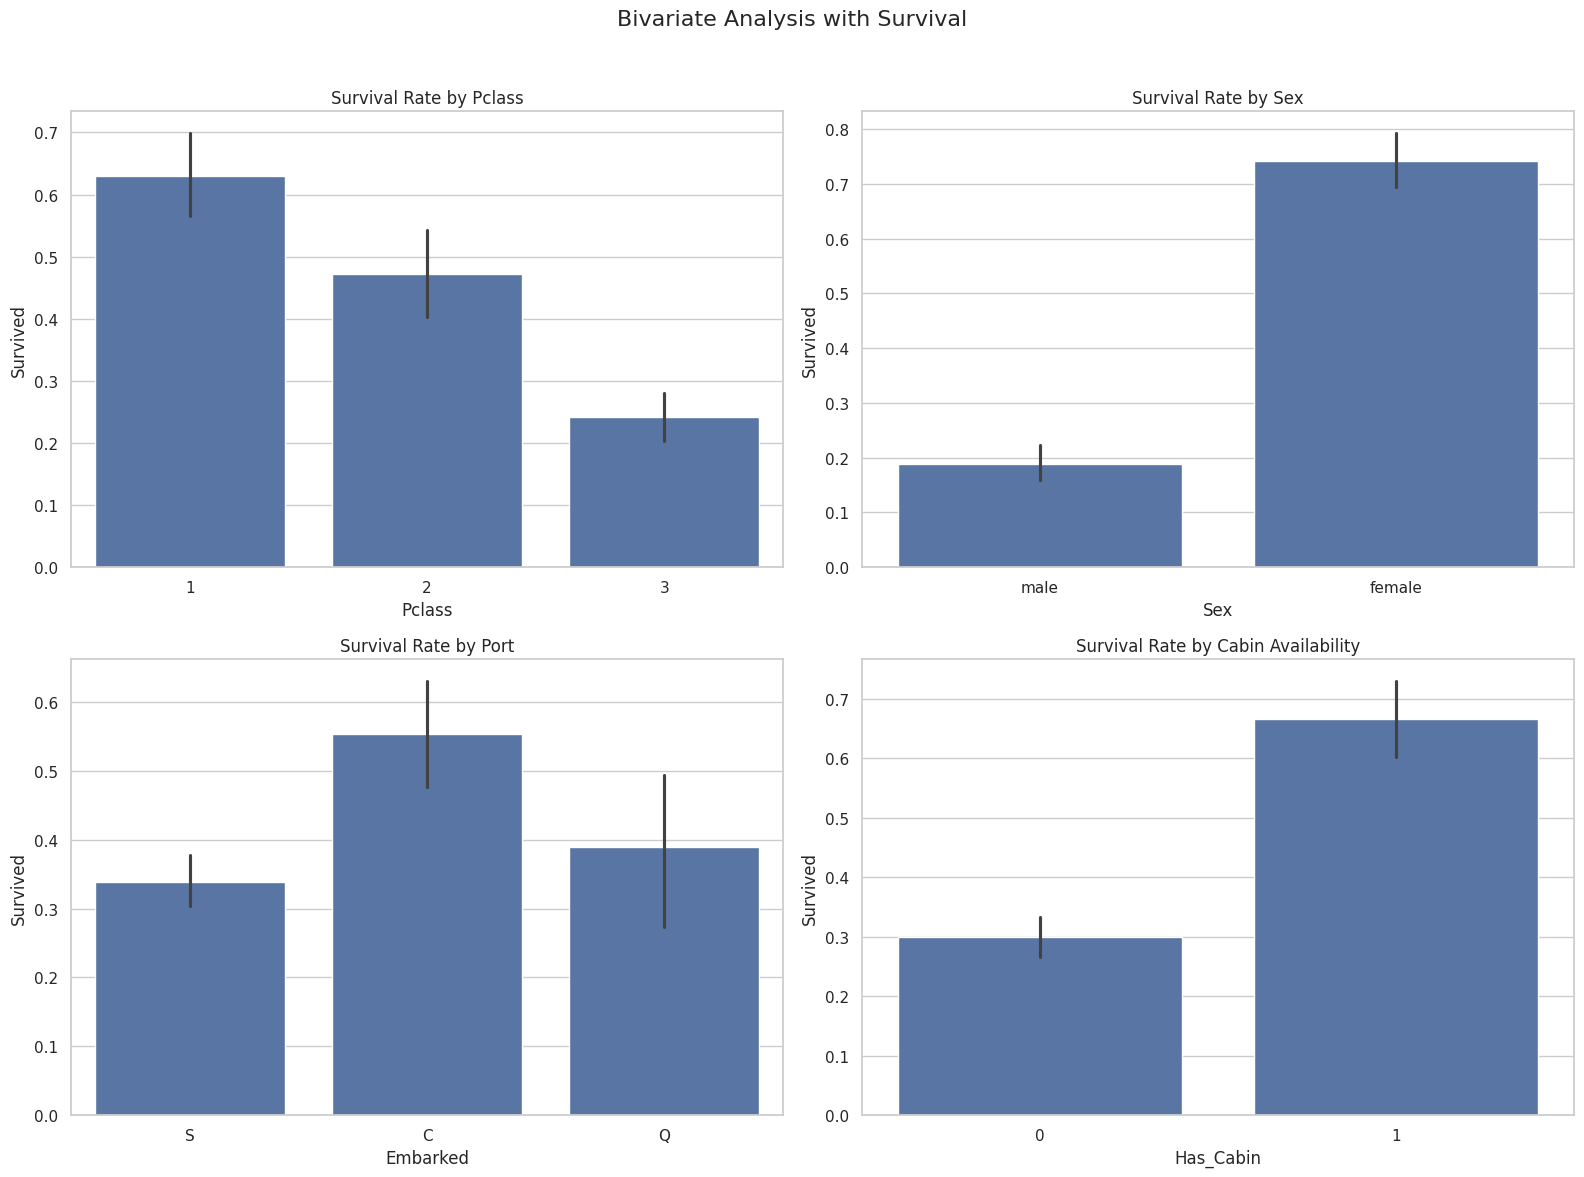

In [104]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=titanic_df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=titanic_df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=titanic_df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=titanic_df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

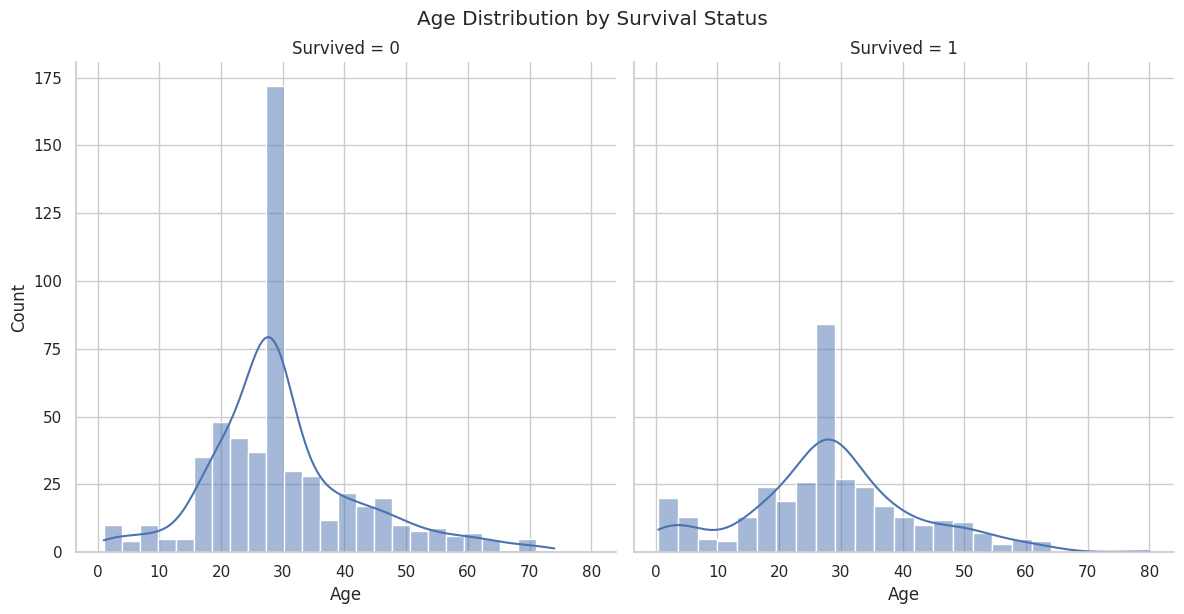

In [105]:
# Age vs. Survival
g = sns.FacetGrid(titanic_df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

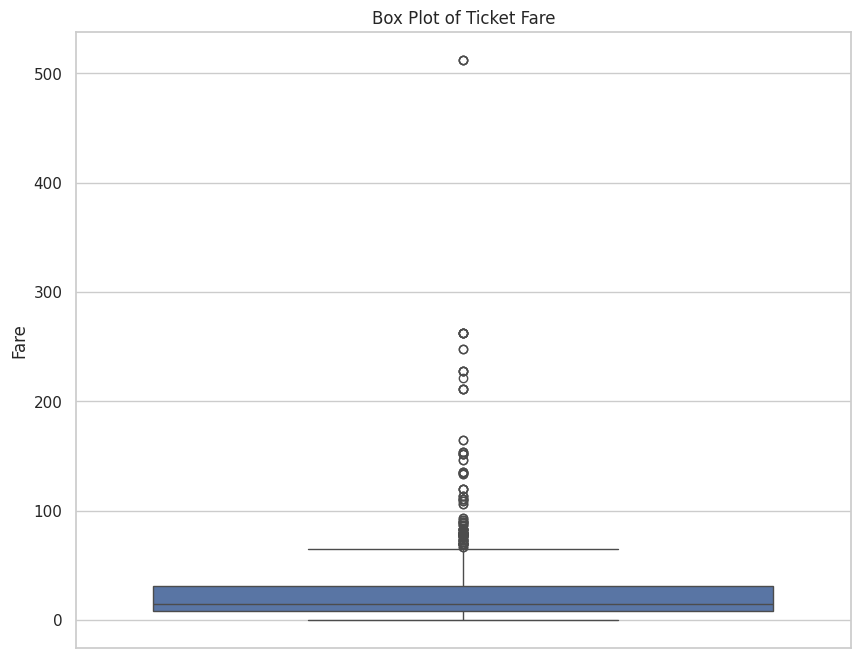

In [106]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=titanic_df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

In [107]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 # +1 for the person themselves

titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
titanic_df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

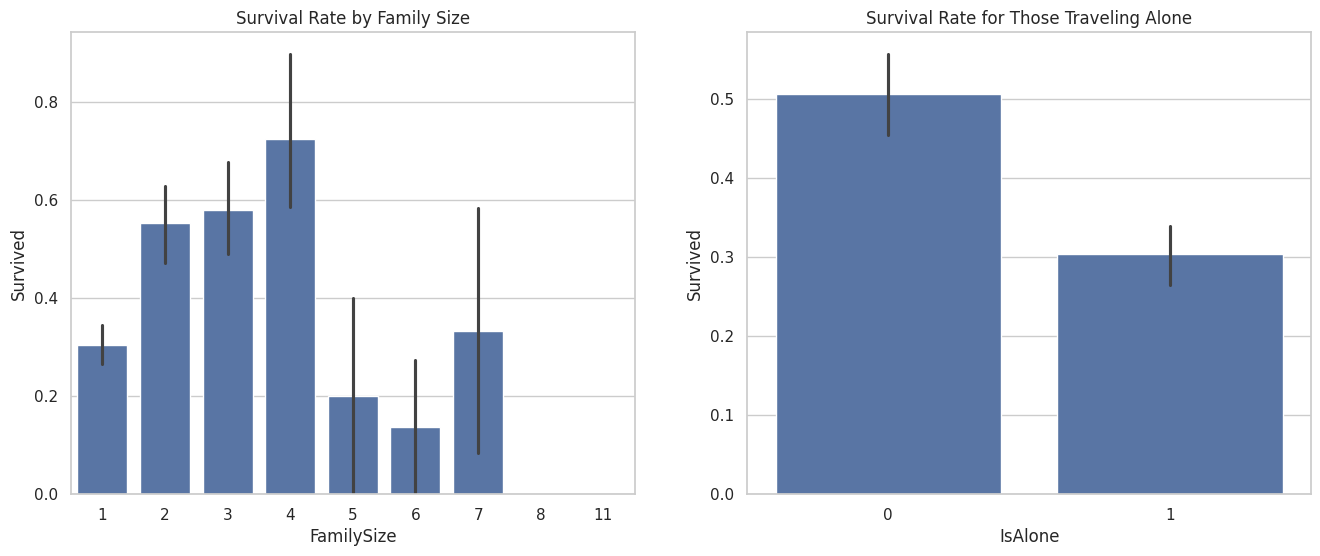

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=titanic_df).set_title('Survival Rate by Family Size')
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=titanic_df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

In [109]:
titanic_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [110]:
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

print("Extracted Titles:")
titanic_df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

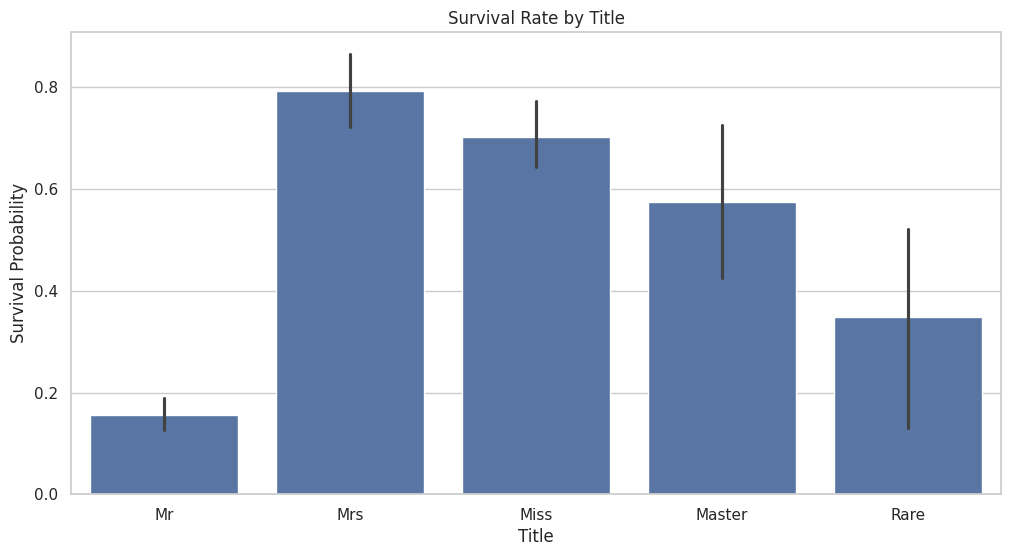

In [111]:
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

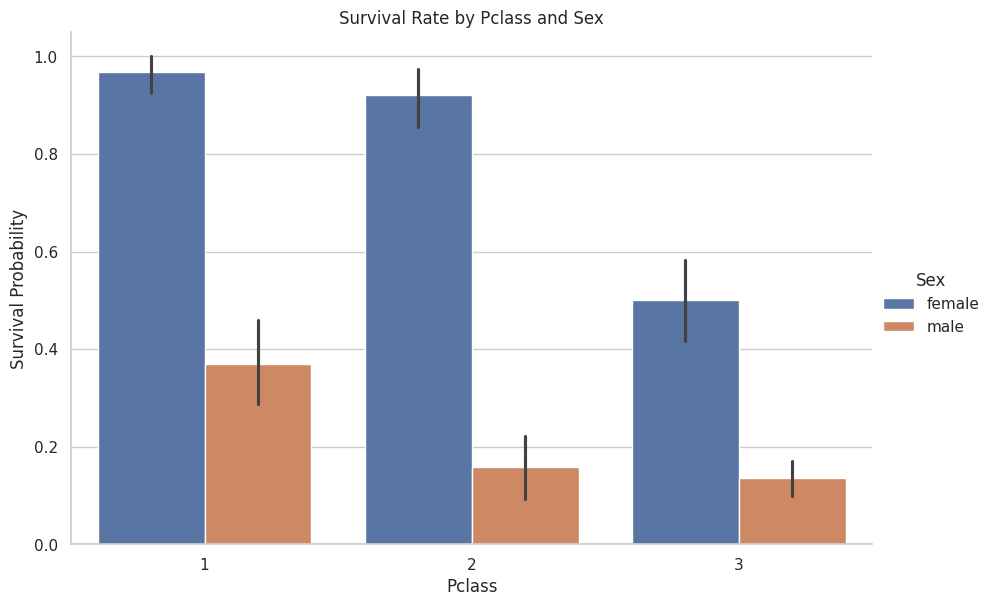

In [112]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

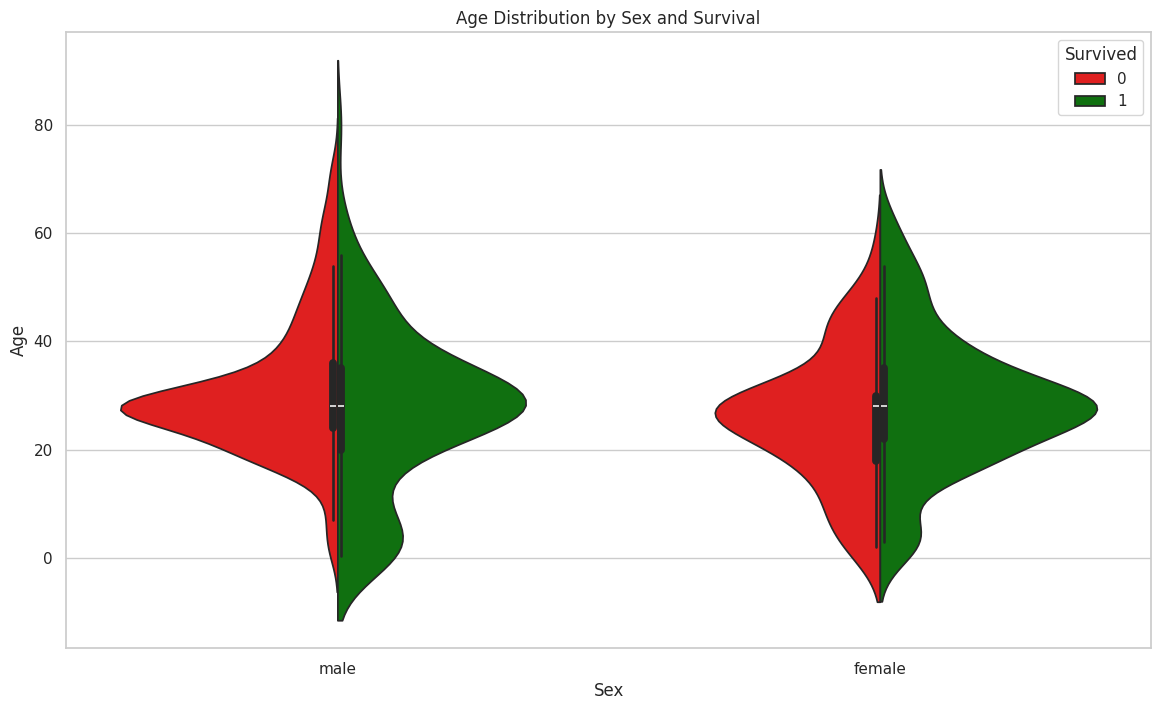

In [113]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: 'red', 1: 'green'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

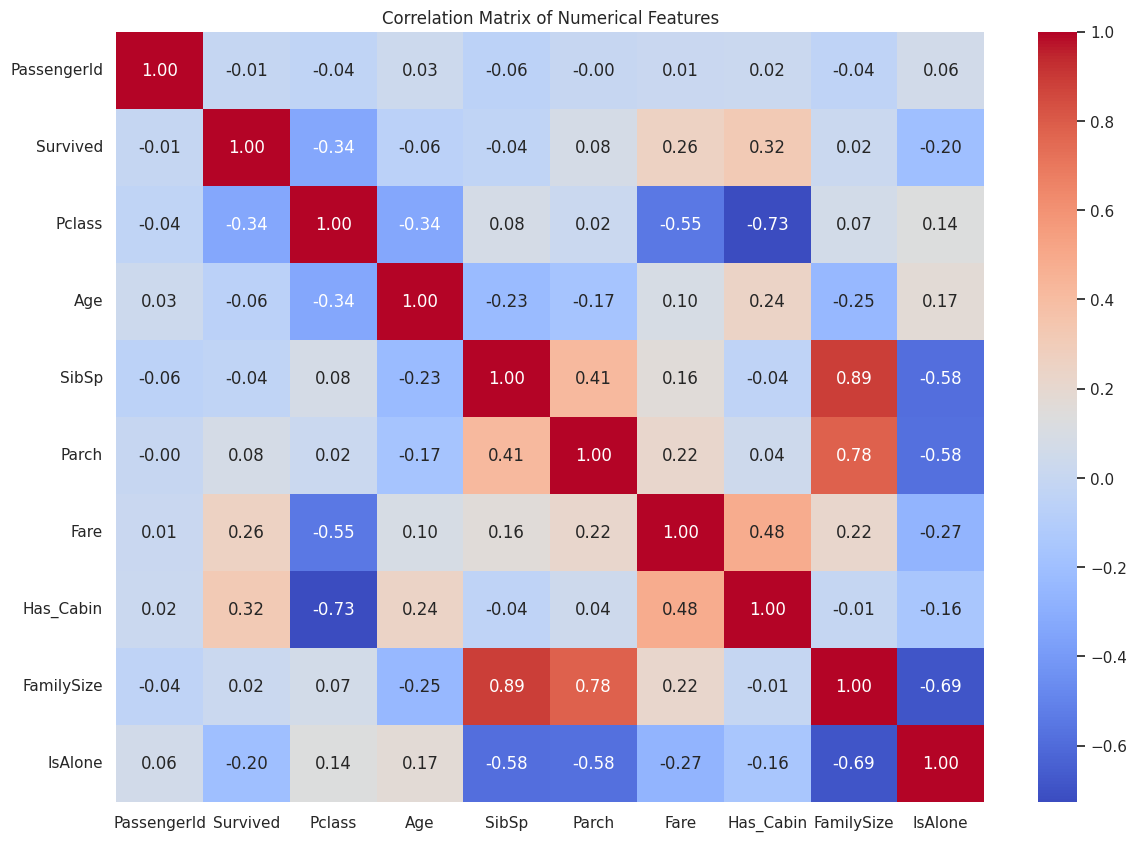

In [114]:
plt.figure(figsize=(14, 10))
numeric_cols = titanic_df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [115]:
!pip install ydata-profiling -q

In [116]:
from ydata_profiling import ProfileReport

profile = ProfileReport(titanic_df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 30.97it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [117]:
profile.to_file("titanic_survival.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]